<a href="https://colab.research.google.com/github/Lumo5683/A-to-Z-Resources-for-Students/blob/master/%E7%AC%AC6%E5%9B%9E%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

M24W0523 易洪標

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
cust_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI活用/customers_data.csv')
cust_df.head()

cust_df = cust_df.drop(['Channel','Region'],axis = 1)
cust_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
colums = cust_df.columns.tolist()
print(colums)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


In [ ]:
Fresh = cust_df['Fresh']
Milk = cust_df['Milk']
Grocery = cust_df['Grocery']
Frozen = cust_df['Frozen']
Detergents_Paper = cust_df['Detergents_Paper']
Delicassen = cust_df['Delicassen']

cust_array = np.array([cust_df['Fresh'].tolist(), cust_df['Milk'].tolist(),cust_df['Grocery'].tolist(),
             cust_df['Frozen'].tolist(),cust_df['Detergents_Paper'].tolist(),cust_df['Delicassen'].tolist(),],np.int32)
cust_array = cust_array.T
print(cust_array[:5,:])

[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 [13265  1196  4221  6404   507  1788]
 [22615  5410  7198  3915  1777  5185]]


In [ ]:
clusters = 4
clf = KMeans(n_clusters=clusters)
clf.fit(cust_array)
pred = clf.predict(cust_array)
cust_df['cluster_id'] = pred
cust_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,cluster_id
0,12669,9656,7561,214,2674,1338,3,2
1,7057,9810,9568,1762,3293,1776,3,2
2,6353,8808,7684,2405,3516,7844,3,2
3,13265,1196,4221,6404,507,1788,1,1
4,22615,5410,7198,3915,1777,5185,1,1


In [ ]:
cluster_counts = cust_df['cluster_id'].value_counts()
print('the counts of ecah clusters:\n',cluster_counts)

the counts of ecah clusters:
 cluster_id
0    269
1    110
2     50
3     11
Name: count, dtype: int64


In [ ]:
cluster_means = cust_df.groupby('cluster_id').mean()
print('the means of each clusters:\n',cluster_means)

the means of each clusters:
                    Fresh          Milk       Grocery       Frozen  \
cluster_id                                                          
0            5917.609665   4037.431227   5464.405204  2268.197026   
1           23525.236364   3942.309091   5168.936364  4553.981818   
2            8723.780000  19220.540000  27604.860000  2724.700000   
3           60393.545455   6327.909091   7255.545455  9484.727273   

            Detergents_Paper   Delicassen   Cluster  
cluster_id                                           
0                1928.252788  1051.747212  2.858736  
1                1094.945455  1714.454545  1.136364  
2               12277.340000  3195.360000  0.040000  
3                1349.636364  3605.909091  2.000000  


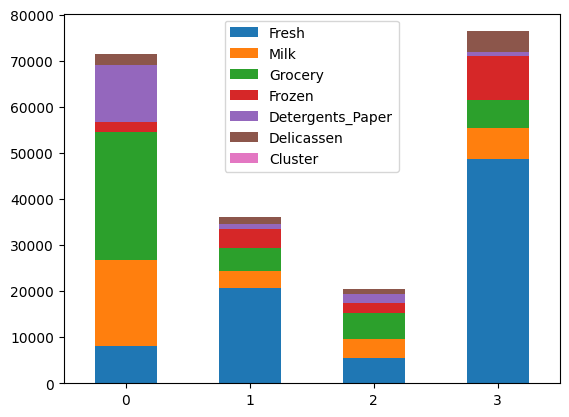

In [ ]:
clusterinfo = pd.DataFrame()
for i in range(clusters):
    clusterinfo[str(i)] = cust_df[cust_df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

my_plot = clusterinfo.T.plot(kind='bar', stacked=True,)
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)
plt.show()

> まとめ：
1.生鮮食品、牛乳、食料雑貨の売上高が多い。
2.冷凍食品、衛生用品、惣菜の売上高が少ない。

> 経営戦略：生鮮食品、牛乳、食料雑貨の仕入れを増やし、冷凍食品、衛生用品、惣菜は仕入れを少し減らすことができる


